In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.constants import M_sun
import numpy as np
import os
top = os.getenv('HOME')+'/codes/dispatch2/'
os.chdir(top+'experiments/ISM/python')
import tqdm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

import sys
sys.path.insert(0,top+'utilities/python')
import dispatch as dis
import dispatch.select as dse
import dispatch.graphics as dgr
import dispatch.particles as dpa


sys.path.append('my_funcs/')
from plot_funcs import plot_density, plot_velocity
from pipeline_main_nosink import pipeline_nosink
from pipeline_2D_nosink import to_osyris_ivs
from pipeline_main import pipeline
from pipeline_2D import to_osyris_ivs

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)


# Sink 13

In [2]:
ramses_pos_14 = np.array([0.058000602, 0.17543303, 0.76258907])
print('DISPATCH pos:', ramses_pos_14 - 0.5)

DISPATCH pos: [-0.4419994  -0.32456697  0.26258907]


Initialising patch data


100%|██████████| 3553/3553 [00:20<00:00, 170.13it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 3543/3543 [00:11<00:00, 317.70it/s]


Setting up Osyris data structure


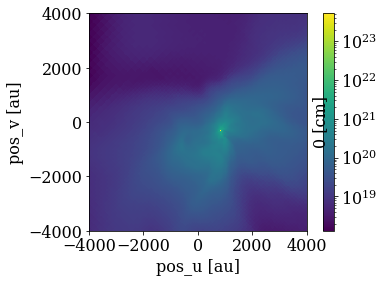

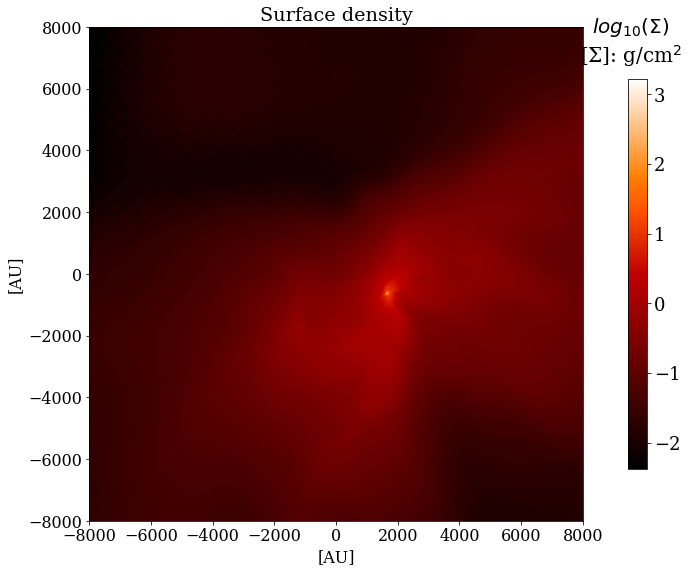

In [3]:
data_14i = pipeline_nosink(snap = 177, run = 'sink13amr01', sink_pos = ramses_pos_14 - 0.5)
variable = ['d']
data_14i.to_osyris_ivs(variables=variable, resolution=400, view = 8e3, viewpoint=np.array([0,0,1]), plot = True, dz = 8e3)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_14i.osyris_ivs[0] * data_14i.cgs_density), extent = (-8e3, 8e3, -8e3, 8e3), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = 'Surface density', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

In [2]:
ramses_pos_14 = np.array([0.058000602, 0.17543303, 0.76258907])
print('DISPATCH pos:', ramses_pos_14 - 0.5)
data_14i = pipeline_nosink(snap = 176, run = '.', sink_pos = ramses_pos_14 - 0.5, data = '/groups/astro/kxm508/codes/dispatch2/experiments/christian/sink_014/data_dispatch')

DISPATCH pos: [-0.4419994  -0.32456697  0.26258907]
Initialising patch data


100%|██████████| 4715/4715 [01:25<00:00, 55.40it/s] 


Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4715/4715 [00:23<00:00, 204.51it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 1847/1847 [00:07<00:00, 247.41it/s]


Setting up Osyris data structure


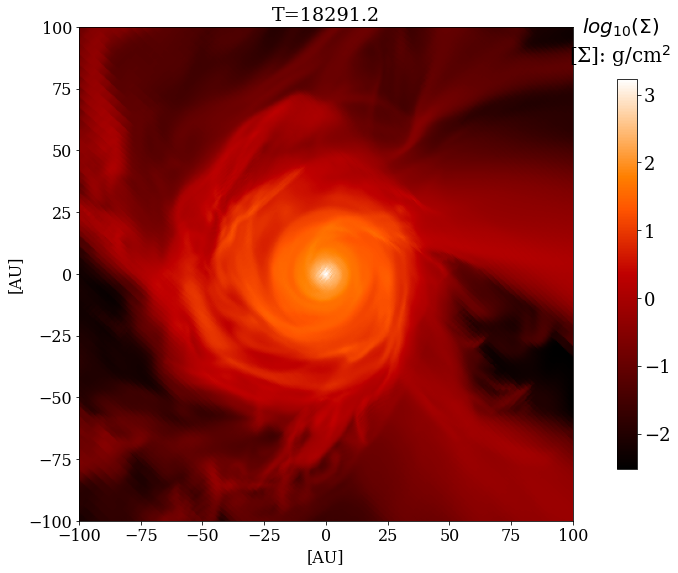

In [3]:
data_13n = pipeline(snap=213, run='sink13core02', sink_id=13)
data_13n.calc_L()
variable = ['d']
view = 200
data_13n.to_osyris_ivs(variables=variable, view = view)#, dz = view, viewpoint=np.cross(data_13n.L, np.array([0,0,1])))

extent = view // 2
fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_13n.osyris_ivs[0] * data_13n.cgs_density), extent = (-extent, extent, -extent, extent), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = f'T={data_13n.time - data_14i.time:4.1f}', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

#print(data_225.sn.sinks[225][0].position, ramses_pos_225 - 0.5)

# Sink 225

In [1]:
ramses_pos_225 = np.array([0.31840596, 0.74889234, 0.95780638])
print('DISPATCH pos:', ramses_pos_225 - 0.5)

data_225i = pipeline_nosink(snap = 445, run = '.', sink_pos = ramses_pos_225 - 0.5, data = '/groups/astro/buks/codes/dispatch2/experiments/ramses_snapshots/data/core_225/')

NameError: name 'np' is not defined

Initialising patch data


100%|██████████| 4903/4903 [00:18<00:00, 265.88it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 2025/2025 [00:07<00:00, 260.30it/s]


Setting up Osyris data structure


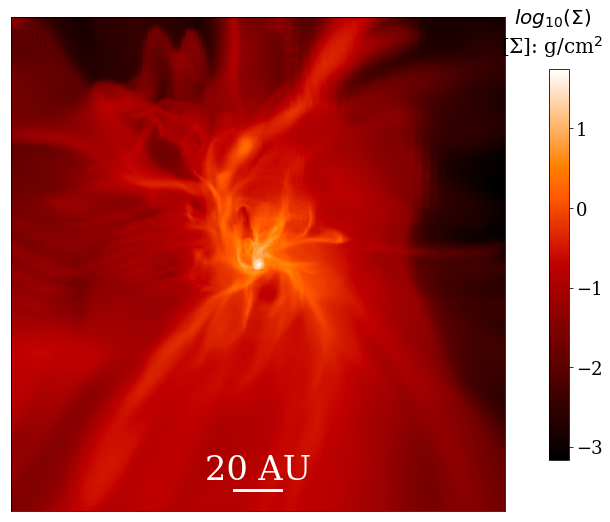

In [2]:
data_225 = pipeline(snap=490, run='sink225pol01', sink_id=225)
data_225.calc_L()
variable = ['d']
data_225.to_osyris_ivs(variables=variable, view = 200)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_225.osyris_ivs[0] * data_225.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set_xticks([]); axs.set_yticks([])
scalebar = AnchoredSizeBar(axs.transData, 20, '20 AU', 'lower center', 
                    pad=0.5,
                    color='white',
                    
                    frameon=False,
                    fontproperties = fm.FontProperties(size=28*1.2),
                    size_vertical=1,
                    label_top=True)

axs.add_artist(scalebar)

#axs.set(title = f'T = {data_225.time - data_225i.time:4.1f} yr', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4903/4903 [00:12<00:00, 396.05it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 2024/2024 [00:08<00:00, 241.57it/s]


Setting up Osyris data structure


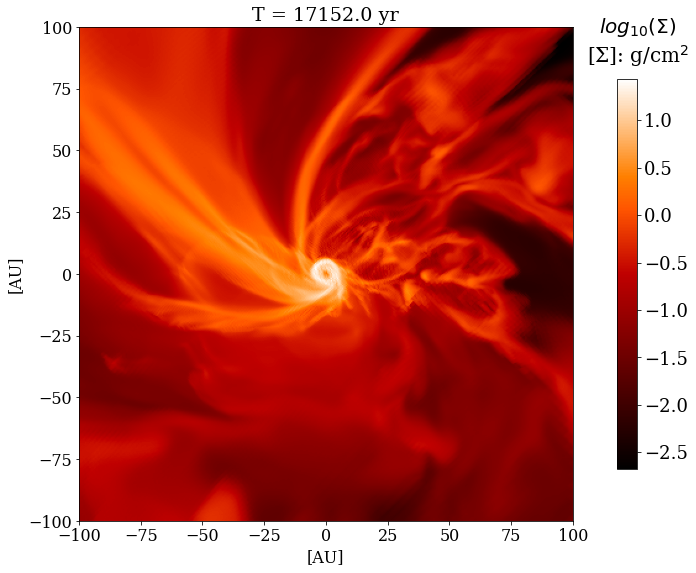

In [3]:
data_225 = pipeline(snap=479, run='sink225core02', sink_id=225)
data_225.calc_L()
variable = ['d']
data_225.to_osyris_ivs(variables=variable, view = 200)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_225.osyris_ivs[0] * data_225.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = f'T = {data_225.time - data_225i.time:4.1f} yr', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

# Sink 80

DISPATCH pos: [ 0.33483083  0.44080048 -0.19322944]
Initialising patch data


100%|██████████| 6310/6310 [00:08<00:00, 731.35it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 6300/6300 [00:22<00:00, 285.81it/s]


Setting up Osyris data structure


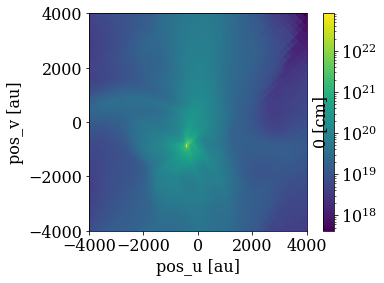

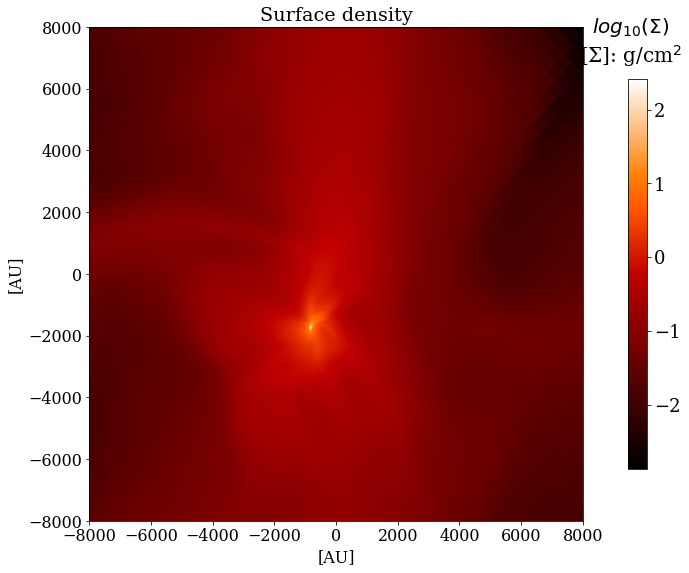

In [5]:
ramses_pos_80 = np.array([0.83483083, 0.94080048, 0.30677056])
print('DISPATCH pos:', ramses_pos_80 - 0.5)

data_80i = pipeline_nosink(snap = 235, run = '.', sink_pos = ramses_pos_80 - 0.5, data = '/groups/astro/buks/codes/dispatch2/experiments/ramses_snapshots/data/core_082')
variable = ['d']
data_80i.to_osyris_ivs(variables=variable, resolution=400, view = 8e3, viewpoint=np.array([0,0,1]), plot = True, dz = 8e3)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_80i.osyris_ivs[0] * data_80i.cgs_density), extent = (-8e3, 8e3, -8e3, 8e3), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = 'Surface density', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

Initialising patch data


100%|██████████| 6310/6310 [00:04<00:00, 1312.79it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 2910/2910 [00:10<00:00, 283.74it/s]


Setting up Osyris data structure


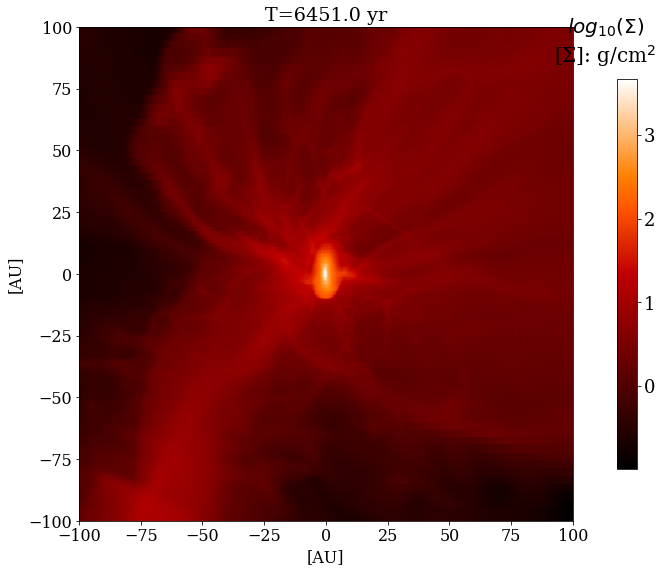

In [8]:
data_80 = pipeline(snap=284, run='sink80pol01', sink_id=80)
data_80.calc_L()
variable = ['d']
data_80.to_osyris_ivs(variables=variable, view = 200, dz = 200, viewpoint= np.cross(np.array([0,0,1]), data_80.L))

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_80.osyris_ivs[0] * data_80.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = f'T={data_80.time - data_80i.time:4.1f} yr', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

# Sink 24

In [2]:
ramses_pos_25 = np.array([0.31512337, 0.98594382, 0.063366837])
print('DISPATCH pos:', ramses_pos_25 - 0.5)

data_25i = pipeline_nosink(snap = 212, run = '.', sink_pos = ramses_pos_25 - 0.5, data = '/groups/astro/kxm508/codes/dispatch2/experiments/christian/sink_025/data_dispatch')

DISPATCH pos: [-0.18487663  0.48594382 -0.43663316]
Initialising patch data


100%|██████████| 6212/6212 [01:06<00:00, 93.99it/s] 


Initialising patch data


100%|██████████| 6212/6212 [00:26<00:00, 234.06it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 2594/2594 [00:09<00:00, 262.87it/s]


Setting up Osyris data structure


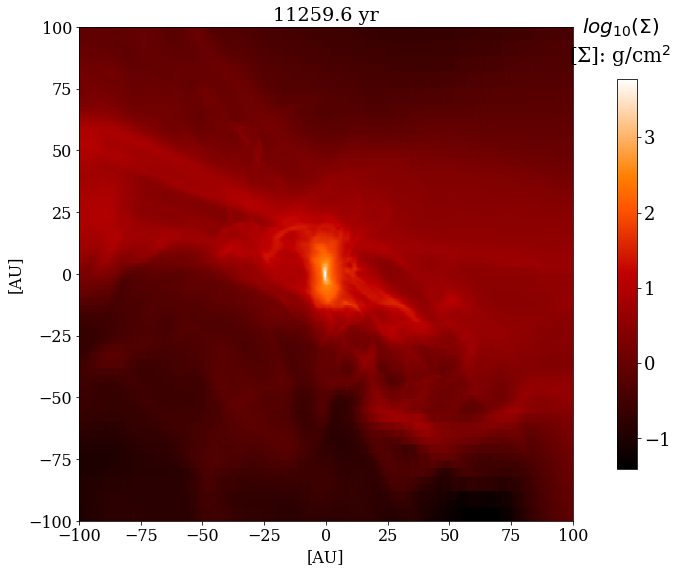

In [3]:
data_25 = pipeline(snap=235, run='sink24pol01', sink_id=24)
data_25.calc_L()
variable = ['d']
data_25.to_osyris_ivs(variables=variable, view = 200, viewpoint=np.cross(np.array([0,0,1]), data_25.L), dz = 200)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_25.osyris_ivs[0] * data_25.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = f'{data_25.time - data_25i.time:4.1f} yr', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 6212/6212 [00:25<00:00, 246.32it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 2594/2594 [00:09<00:00, 262.95it/s]


Setting up Osyris data structure


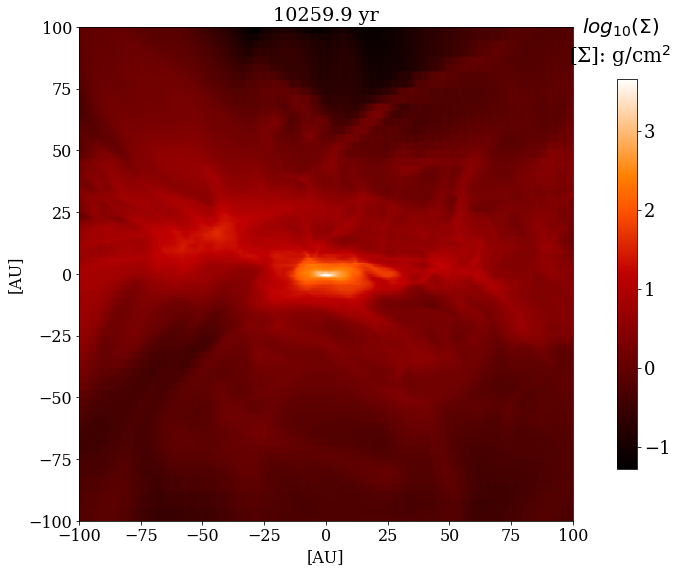

In [3]:
data_25 = pipeline(snap=233, run='sink24core02', sink_id=24)
data_25.calc_L()
variable = ['d']
data_25.to_osyris_ivs(variables=variable, view = 200, viewpoint=np.cross(np.array([0,0,1]), data_25.L), dz = 200)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_25.osyris_ivs[0] * data_25.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = f'{data_25.time - data_25i.time:4.1f} yr', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

# Sink 178

In [9]:
ramses_pos_178 = np.array([0.96270836, 0.46696171, 0.97030800])
data_178i = pipeline_nosink(snap = 403, run = '.', sink_pos = ramses_pos_178 - 0.5, data = '/groups/astro/buks/codes/dispatch2/experiments/ramses_snapshots/data/core_180/')

Initialising patch data


100%|██████████| 4855/4855 [00:53<00:00, 90.72it/s] 


Initialising patch data


100%|██████████| 4855/4855 [00:17<00:00, 272.56it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 2498/2498 [00:11<00:00, 220.77it/s]


Setting up Osyris data structure


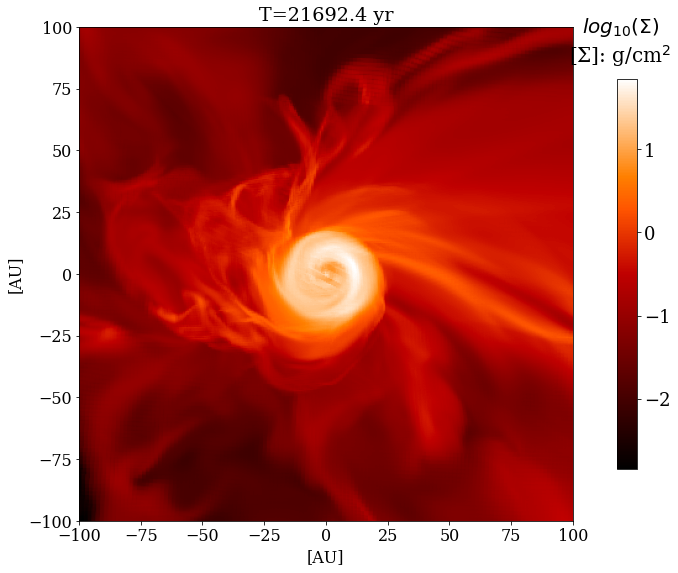

In [5]:
data_178 = pipeline(snap=446, run='sink178pol01', sink_id=178)
data_178.calc_L()
variable = ['d']
data_178.to_osyris_ivs(variables=variable, view = 200)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_178.osyris_ivs[0] * data_178.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = f'T={data_178.time - data_178i.time:4.1f} yr', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

#print(data_180.sn.sinks[178][0].position, ramses_pos_180 - 0.5)


In [18]:
data_178 = pipeline(snap=413, run='sink178core02', sink_id=178)
data_178.calc_L()
variable = ['d']
data_178.to_osyris_ivs(variables=variable, view = 200)

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_178.osyris_ivs[0] * data_178.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = f'T={data_178.time - data_178i.time:4.1f} yr', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

#print(data_180.sn.sinks[178][0].position, ramses_pos_180 - 0.5)


directory ../data/sink178core02/00413/ has no snapshot.nml file


AttributeError: 'snapshot' object has no attribute 'patches'

# Sink 122

In [2]:
ramses_pos_122 = np.array([0.71907158, 0.59524271, 0.34094426])
print('DISPATCH pos:', ramses_pos_122 - 0.5)
data_122i = pipeline_nosink(snap = 341, run = '.', sink_pos = ramses_pos_122 - 0.5, data = '/groups/astro/kxm508/codes/dispatch2/experiments/christian/sink_122/data_dispatch')

DISPATCH pos: [ 0.21907158  0.09524271 -0.15905574]


Initialising patch data


100%|██████████| 5026/5026 [00:59<00:00, 84.45it/s] 


Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 5026/5026 [00:22<00:00, 224.34it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 2164/2164 [00:09<00:00, 226.36it/s]


Setting up Osyris data structure


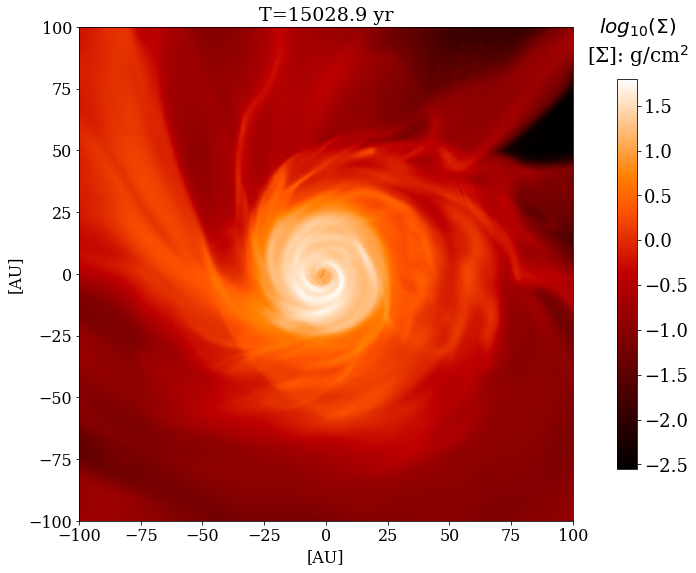

In [3]:
data_122 = pipeline(snap=371, run='sink122core02', sink_id=122)
data_122.calc_L()
variable = ['d']
data_122.to_osyris_ivs(variables=variable, view = 200)#, dz = 200, viewpoint= np.cross(np.array([0,0,1]), data_122.L))

fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data_122.osyris_ivs[0] * data_122.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = f'T={data_122.time - data_122i.time:4.1f} yr', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)